In [53]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [54]:
def read_csv_files(folder_path):
    """Read all CSV files from a folder and return a dictionary of dataframes."""
    csv_files = {}
    folder = Path(folder_path)
    
    if not folder.exists():
        print(f"Warning: Folder {folder_path} not found")
        return csv_files
    
    for csv_file in folder.glob("*.csv"):
        try:
            df = pd.read_csv(csv_file)
            # Extract the name without extension
            name = csv_file.stem
            csv_files[name] = df
        except Exception as e:
            print(f"Error reading {csv_file}: {e}")
    
    return csv_files

In [55]:
def plot_metrics(loss_folder='csv_loss', train_folder='csv_train_rewards', test_folder='csv_test_rewards'):
    """Plot loss, train rewards, and test rewards in a grid layout."""
    
    # Read CSV files from each folder
    loss_data = read_csv_files(loss_folder)
    train_data = read_csv_files(train_folder)
    test_data = read_csv_files(test_folder)
    
    # Create figure with 3 subplots in a row
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Define colors for different methods (similar to the image)
    colors = {
        'DQN':     '#2196F3',  # Bright blue
        'C51':     '#FF7043',  # Coral orange
        'Rainbow': '#4CAF50',  # Fresh green
        'DRQN':    '#F44336',  # Material red
        'DTQN':    '#9C27B0',  # Rich purple
    }
    
    # Plot Loss
    ax = axes[0]
    for name, df in loss_data.items():
        # Determine which method based on filename
        method = None
        for key in colors.keys():
            if key.lower() in name.lower():
                method = key
                break
        
        if method is None:
            method = name  # Use filename as label if no match
            color = None
        else:
            color = colors[method]
        
        # Plot with smoothing
        x = df['Step'].values / 1e6  # Scale x-axis
        y = df['Value'].values
        
        # Simple moving average for smoothing
        window = max(1, len(y) // 50)  # Adjust window size
        if len(y) > window:
            y_smooth = pd.Series(y).rolling(window=window, center=True).mean()
            ax.plot(x, y_smooth, label=method, color=color, linewidth=2, alpha=0.8)
            # Add shaded region for variance
            y_std = pd.Series(y).rolling(window=window, center=True).std()
            ax.fill_between(x, y_smooth - y_std, y_smooth + y_std, alpha=0.2, color=color)
        else:
            ax.plot(x, y, label=method, color=color, linewidth=2, alpha=0.8)
    
    ax.set_xlabel('Steps (×10⁶)', fontsize=12)
    ax.set_ylabel('Loss', fontsize=12)
    ax.set_title('Training Loss', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Plot Train Rewards
    ax = axes[1]
    for name, df in train_data.items():
        method = None
        for key in colors.keys():
            if key.lower() in name.lower():
                method = key
                break
        
        if method is None:
            method = name
            color = None
        else:
            color = colors[method]
        
        x = df['Step'].values / 1e6
        y = df['Value'].values
        
        window = max(1, len(y) // 50)
        if len(y) > window:
            y_smooth = pd.Series(y).rolling(window=window, center=True).mean()
            ax.plot(x, y_smooth, label=method, color=color, linewidth=2, alpha=0.8)
            y_std = pd.Series(y).rolling(window=window, center=True).std()
            ax.fill_between(x, y_smooth - y_std, y_smooth + y_std, alpha=0.1, color=color)
        else:
            ax.plot(x, y, label=method, color=color, linewidth=2, alpha=0.8)
    
    ax.set_xlabel('Steps (×10⁶)', fontsize=12)
    ax.set_ylabel('Reward', fontsize=12)
    ax.set_title('Training Rewards', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Plot Test Rewards
    ax = axes[2]
    for name, df in test_data.items():
        method = None
        for key in colors.keys():
            if key.lower() in name.lower():
                method = key
                break
        
        if method is None:
            method = name
            color = None
        else:
            color = colors[method]
        
        x = df['Step'].values / 1e6  # Scale x-axis
        y = df['Value'].values
        
        window = max(1, len(y) // 50)
        if len(y) > window:
            y_smooth = pd.Series(y).rolling(window=window, center=True).mean()
            ax.plot(x, y_smooth, label=method, color=color, linewidth=2, alpha=0.8)
            y_std = pd.Series(y).rolling(window=window, center=True).std()
            ax.fill_between(x, y_smooth - y_std, y_smooth + y_std, alpha=0.2, color=color)
        else:
            ax.plot(x, y, label=method, color=color, linewidth=2, alpha=0.8)
    
    ax.set_xlabel('Steps (×10⁶)', fontsize=12)
    ax.set_ylabel('Reward', fontsize=12)
    ax.set_title('Test Rewards', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Add a single legend at the bottom of the figure
    handles, labels = axes[0].get_legend_handles_labels()
    
    # Remove duplicates while preserving order
    by_label = dict(zip(labels, handles))
    fig.legend(by_label.values(), by_label.keys(), 
              loc='lower center', 
              bbox_to_anchor=(0.5, -0.05),
              ncol=len(by_label),
              frameon=True,
              fontsize=12)
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)  # Make room for legend
    
    # Save figure
    # output_path = '/mnt/user-data/outputs/training_metrics.png'
    # plt.savefig(output_path, dpi=300, bbox_inches='tight')
    # print(f"Plot saved to {output_path}")
    
    # return output_path

    plt.show()

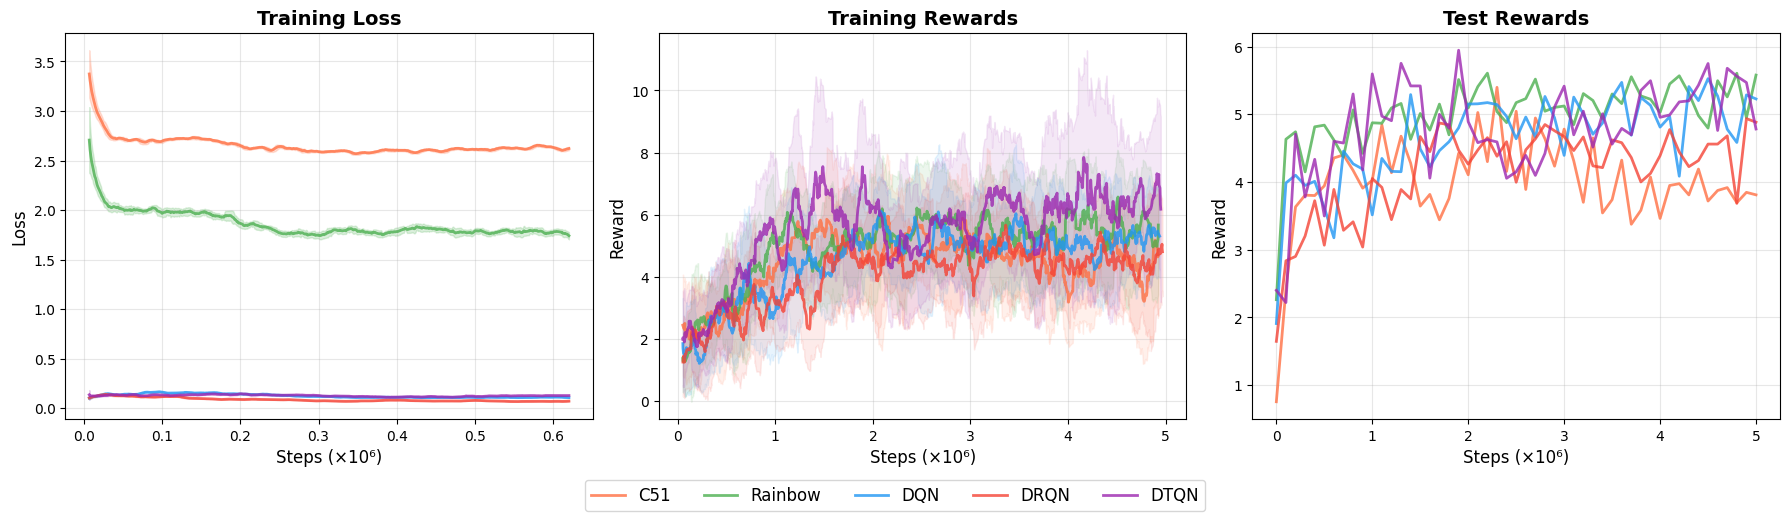

In [56]:
import sys
    
base_path = 'csvs/defend_the_center'  # Base path for uploaded CSVs

# Try to find the folders
loss_folder = None
train_folder = None
test_folder = None

# Check in uploads directory first
if os.path.exists(f'{base_path}/csv_loss'):
    loss_folder = f'{base_path}/csv_loss'
    train_folder = f'{base_path}/csv_train_rewards'
    test_folder = f'{base_path}/csv_test_rewards'

# Run the plotting function
output_file = plot_metrics(loss_folder, train_folder, test_folder)